In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Using SVM

In [ ]:
# Importing necessary packages

import os
import cv2
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import svm

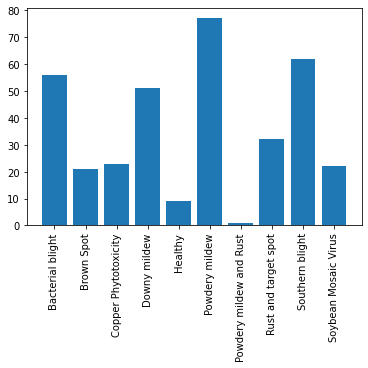

In [ ]:
dataset = '/content/gdrive/MyDrive/Colab Notebooks/Dataset/'
folders = os.listdir(dataset)
folders.sort()

# Count no.of images w.r.t each disease
img_count = {}
for folder in folders:
    cnt = len(os.listdir(dataset+folder+os.sep))
    img_count[folder] = cnt
# Plotting barplots of no.of leaf images w.r.t each disease
plt.bar(img_count.keys(), img_count.values())
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
dir='/content/gdrive/MyDrive/Colab Notebooks/Dataset'
categories=['Bacterial blight','Brown Spot','Copper Phytotoxicity','Downy mildew','Healthy','Powdery mildew','Powdery mildew and Rust','Rust and target spot','Southern blight','Soybean Mosaic Virus']

data=[]

for category in categories:
    path=os.path.join(dir,category)
    label=categories.index(category)
    
    for img in os.listdir(path):  # List all the images in a directory
        imgpath=os.path.join(path,img)
        leaf_image=cv2.imread(imgpath,0)

        
        try:
            leaf_image=cv2.resize(leaf_image,(100,100))
            image=np.array(leaf_image).flatten()
            # An image will be in a 2D array and now I am making it into a single 1-D array.

            data.append([image,label])
            
        except Exception as e:
            pass
        # Many images are hard to resize so use a try and catch block.
 
print(len(data))

354


In [ ]:
random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
# print(features)    
len(features)

354

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(features, labels, test_size=0.45)

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(X_train,Y_train)
print('The Model is trained well with the given images')

Splitted Successfully


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


The Model is trained well with the given images


In [ ]:
from sklearn.metrics import accuracy_score
Y_pred=model.predict(X_test)
print("The predicted Data is :")
print(Y_pred)
print("The actual data is:")
print(np.array(Y_test))
print(f"The model is {accuracy_score(Y_pred,Y_test)*100}% accurate")

The predicted Data is :
[0 3 0 8 0 0 9 8 8 0 0 8 8 8 3 5 5 5 3 7 3 3 4 8 3 5 0 3 3 3 8 0 8 5 0 0 5
 9 1 7 8 8 3 8 5 5 8 8 7 3 9 5 5 5 3 8 3 0 5 3 1 8 8 5 8 3 5 8 2 5 4 9 0 0
 8 5 5 0 1 9 5 0 5 8 5 2 8 2 5 3 5 5 0 7 5 5 8 8 5 3 0 0 1 3 0 7 5 0 0 0 0
 8 7 3 8 7 5 3 5 5 8 8 9 8 3 1 8 5 0 2 8 2 0 0 7 0 3 0 5 5 0 0 5 8 5 5 3 0
 7 1 0 8 3 8 2 9 3 8 8 2]
The actual data is:
[2 3 0 3 7 0 9 8 5 2 0 1 3 8 1 5 5 1 3 7 3 3 4 2 1 5 0 5 3 1 8 0 8 5 0 2 5
 9 1 7 8 8 3 8 9 5 8 8 7 3 9 8 5 5 3 8 3 0 5 3 1 8 8 8 8 8 5 8 2 5 4 9 0 0
 8 5 3 0 1 9 9 7 8 8 8 2 8 2 5 3 5 9 0 7 5 5 5 8 8 3 0 0 6 3 2 7 5 0 0 0 0
 8 7 3 8 7 8 3 1 5 8 3 9 8 3 1 5 5 0 2 5 2 0 0 7 0 9 0 5 8 0 0 5 3 0 5 3 0
 7 1 0 8 3 8 2 9 3 8 8 2]
The model is 76.875% accurate


In [ ]:
param_grid={'C':[0.1,1,10,100],'kernel':['rbf','poly']}
svc=SVC(gamma='auto',probability=True)
model=GridSearchCV(svc,param_grid)

#model=svm.SVC(C=1,kernel='poly',gamma='auto',probability=True)
model.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(gamma='auto', probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf', 'poly']})

In [ ]:
accuracy=model.score(X_test, Y_test)
predictions=model.predict(X_test)
print("Accuracy", accuracy)

Accuracy 0.53125


Text(0.5, 1.0, 'Confusion Matrix')

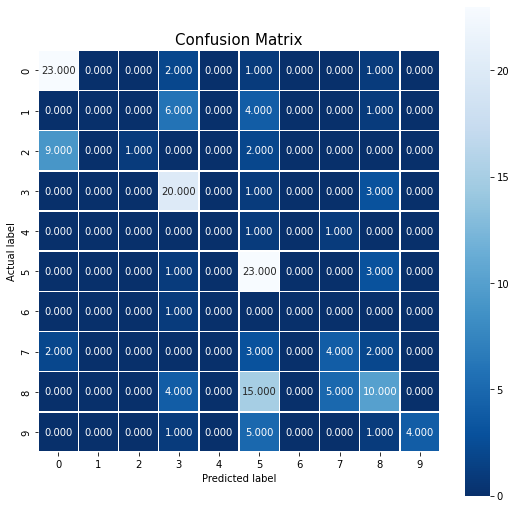

In [ ]:
import seaborn as sns
cm = confusion_matrix(Y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Confusion Matrix'.format(accuracy_score(Y_test,predictions))
plt.title(all_sample_title,size=15)

# Test-Cases


Enter your Input/content/gdrive/MyDrive/Colab Notebooks/Dataset/Bacterial blight/Crestamento bacteriano (2).jpg


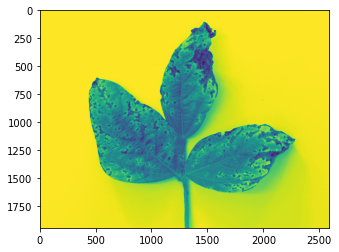

The predicted image is : Bacterial blight


In [ ]:
url=input('Enter your Input')
img=cv2.imread(url,0)
plt.imshow(img)
plt.show()
img_resize=cv2.resize(img,(100,100))
l=[img_resize.flatten()]
probability=model.predict_proba(l)

# for ind,val in enumerate(categories):
#     print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+categories[model.predict(l)[0]])

#/content/gdrive/MyDrive/Colab Notebooks/Dataset/Bacterial blight/Crestamento bacteriano (2).jpg

Enter your Input/content/gdrive/MyDrive/Colab Notebooks/Dataset/Brown Spot/DSC_0073.jpg


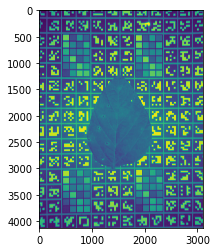

The predicted image is : Brown Spot


In [ ]:
url=input('Enter your Input')
img=cv2.imread(url,0)
plt.imshow(img)
plt.show()
img_resize=cv2.resize(img,(100,100))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
# for ind,val in enumerate(categories):
#     print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+categories[model.predict(l)[0]])

#/content/gdrive/MyDrive/Colab Notebooks/Dataset/Brown Spot/DSC_0073.jpg

Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import image as mping
import glob
from sklearn import metrics
from skimage.feature import hog
from imutils import paths
import numpy as np
import argparse
import imutils 
import cv2
import os

In [ ]:
dir="/content/gdrive/MyDrive/Colab Notebooks/Dataset/"
categories=['Bacterial blight','Brown Spot','Copper Phytotoxicity','Downy mildew','Healthy','Powdery mildew','Powdery mildew and Rust','Rust and target spot','Southern blight','Soybean Mosaic Virus']

data=[]

for category in categories:
    path=os.path.join(dir,category)
    label=category
#     print(category)
    for img in os.listdir(path):  # List all the images in a directory
        imgpath=os.path.join(path,img)
        animal_image=np.array(mping.imread(imgpath))

        
        try:
            animal_image=cv2.resize(animal_image,(64,128))
            image_hog=hog(animal_image)
            # An image will be in a 2D array and now I am making it into a single 1-D array.

            data.append([image_hog,label])
            
        except Exception as e:
            pass
        # Many images are hard to resize so use a try and catch block.
 
print(len(data))
print(image_hog)

354
[0.2091809  0.         0.06028964 ... 0.07522915 0.         0.09882014]


In [ ]:
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)
print(feature)

[0.2091809  0.         0.06028964 ... 0.07522915 0.         0.09882014]


In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(features, labels, test_size=0.25)

print(X_test[0:5])

x_axis_k_points=[]

f1_euclidean=[]
accuracy_euclidean=[]
conf_euclidean=[]

for k in range(7):
    knn_euclidean=KNeighborsClassifier(n_neighbors=k+1)
    knn_euclidean.fit(X_train,Y_train)
    
    #prediction
    pred_labels_euclidean=knn_euclidean.predict(X_test)
    
    #Accuracy
    acc_euclidean=knn_euclidean.score(X_test,Y_test)
    accuracy_euclidean.append(acc_euclidean)
    
    #Confusion Matrix
    conf_euclidean.append(metrics.confusion_matrix(Y_test,pred_labels_euclidean))
    
    x_axis_k_points.append(k+1)

[array([0.21068868, 0.02808996, 0.04428918, ..., 0.05571891, 0.00445681,
       0.13528501]), array([0.16495726, 0.0021649 , 0.09233996, ..., 0.02632659, 0.0392975 ,
       0.08621993]), array([0.07845378, 0.02749452, 0.02306216, ..., 0.09671957, 0.07237131,
       0.09223285]), array([0.13478271, 0.00952383, 0.05488828, ..., 0.0670142 , 0.02506588,
       0.03456039]), array([0.17878382, 0.02245075, 0.04739541, ..., 0.04330314, 0.04192897,
       0.17143062])]


In [ ]:
f1_manhattan=[]
accuracy_manhattan=[]
conf_manhattan=[]

for k in range(7):
    knn_manhattan=KNeighborsClassifier(n_neighbors=k+1,p=1)
    knn_manhattan.fit(X_train,Y_train)
    
    #prediction
    pred_labels_manhattan=knn_manhattan.predict(X_test)
    
    #Accuracy
    acc_manhattan=knn_manhattan.score(X_test,Y_test)
    accuracy_manhattan.append(acc_manhattan)
    
    #Confusion Matrix
    conf_manhattan.append(metrics.confusion_matrix(Y_test,pred_labels_manhattan))
    
#     x_axis_k_points.append(k+1)

In [ ]:
for i in range(len(f1_euclidean)):
    print('FOR K = ', i+1,',F1 SCORE =', f1_euclidean[i], ',ACCURACY = ', accuracy_euclidean[i],', \nCONFUSION MATRIX: \n', conf_euclidean)

In [ ]:
for i in range(len(f1_manhattan)):
    print('FOR K = ', i+1,',F1 SCORE =', f1_manhattan[i], ',ACCURACY = ', accuracy_manhattan[i],', \nCONFUSION MATRIX: \n', conf_manhattan)

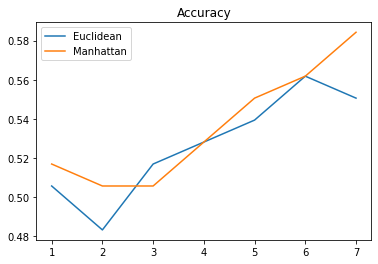

In [ ]:
plt.plot(x_axis_k_points,accuracy_euclidean,label='Euclidean')
plt.plot(x_axis_k_points,accuracy_manhattan,label='Manhattan')
plt.title("Accuracy")
plt.legend()
plt.show()

Image:  (1944, 2592, 3)


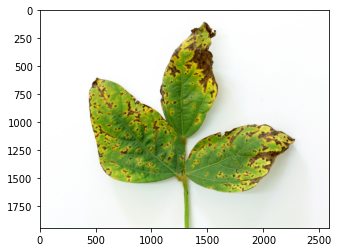

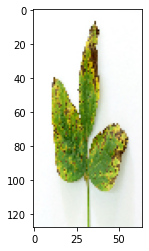

(128, 64, 3)
(6804,)
[0.         0.         0.         ... 0.01256038 0.03247151 0.05246251]
(128, 64)


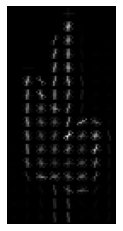

['Bacterial blight']


In [ ]:
img = np.array(mping.imread('/content/gdrive/MyDrive/Colab Notebooks/Dataset/Bacterial blight/Crestamento bacteriano (2).jpg'))
img.setflags(write=1)
print('Image: ',img.shape)
plt.imshow(img)
plt.show()

img_resize= cv2.resize(img,(64,128))
plt.imshow(img_resize)
plt.show()
print(img_resize.shape)

fd,hog_image=hog(img_resize, visualize=True, multichannel=True)
print(fd.shape)
print(fd)
print(hog_image.shape)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")
plt.show()
input_pred=[fd]

pred_labels_euclidean=knn_euclidean.predict(input_pred)
print(pred_labels_euclidean)

#/content/gdrive/MyDrive/Colab Notebooks/Dataset/Bacterial blight/Crestamento bacteriano (2).jpg